<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными." data-toc-modified-id="Знакомство-с-данными.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными.</a></span></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками." data-toc-modified-id="Работа-с-пропусками.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками.</a></span></li><li><span><a href="#Работа-с-типами-данных." data-toc-modified-id="Работа-с-типами-данных.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с типами данных.</a></span></li><li><span><a href="#Работа-с-данными." data-toc-modified-id="Работа-с-данными.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Работа с данными.</a></span></li><li><span><a href="#Работа-с-дубликатами." data-toc-modified-id="Работа-с-дубликатами.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Работа с дубликатами.</a></span></li><li><span><a href="#Исследование-баланса-классов." data-toc-modified-id="Исследование-баланса-классов.-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Исследование баланса классов.</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForestClassifier." data-toc-modified-id="RandomForestClassifier.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>RandomForestClassifier.</a></span></li><li><span><a href="#CatBoostClassifier." data-toc-modified-id="CatBoostClassifier.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostClassifier.</a></span></li><li><span><a href="#Сравнение-выбранной-модели-с-константной." data-toc-modified-id="Сравнение-выбранной-модели-с-константной.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение выбранной модели с константной.</a></span></li><li><span><a href="#Проверка-через-построение-Roc-кривых." data-toc-modified-id="Проверка-через-построение-Roc-кривых.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка через построение Roc-кривых.</a></span></li></ul></li><li><span><a href="#Анализ-значимости-признаков." data-toc-modified-id="Анализ-значимости-признаков.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ значимости признаков.</a></span></li><li><span><a href="#Описательный-профиль-склонного-к-оттоку-клиента." data-toc-modified-id="Описательный-профиль-склонного-к-оттоку-клиента.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Описательный профиль склонного к оттоку клиента.</a></span></li></ul></div>

<div class="alert alert-info"><b>Описание проекта:</b>
   
# "Прогноз поведения клиента банка: уйдёт или останется"

***

**Цели проекта:**
- спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
    
***
    
**Задачи исследования:**  
- построить модель, которая будет прогнозировать значение целевой переменной 'churn'.
    
***
    
**Этапы исследования:** 
- знакомство с данными;
- исследование баланса классов;
- разделение данных на выборки, поиск лучшей модели;
- проверка F1-меры на тестовой выборке;
- дополнительная проверка через построение Roc-кривых;
- общий вывод по исследованию.
    
***
    
<b>Описание данных:</b> 

Целевой признак:
* churn — факт ухода клиента    
    
</div>

***

## Знакомство с данными.

In [25]:
import warnings

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns

# метрики
from sklearn.metrics import (
    roc_auc_score, 
    accuracy_score, 
    recall_score, 
    precision_score, 
    roc_curve, auc, 
    f1_score
)


# Избавляемся от вывода предупреждений
warnings.simplefilter("ignore")

# Отображение всех колонок
pd.set_option('display.max_columns', None)

RANDOM_STATE = 42

In [2]:
# Открываем файл с датасетом.
data = pd.read_table('C:/Датасеты и проекты/churn_train.txt',sep='\s+', engine='python')

In [3]:
# Функция для получения информации о датасете.

def datainfo(dataset):
    print(f'Количество строк и столбцов в датасете: {data.shape}')
    print('*' * 30)
    print('Первые пять строк в датасете:')
    display(data.head())
    print('-' * 30)
    print(f'Пропуски в датасете:\n{data.isna().sum()}')
    print('-' * 30)
    print(f'Информация о типах данных в датасете:\n{data.dtypes}')
    print('-' * 30)
    print('Распределение численных значений признаков в датасете:')
    display(data.describe().T)
    print('-' * 30)
    print(f'Количество явных дубликатов в датасете: {data.duplicated().sum()}')
    print('<-->' * 15,'\n')     

In [4]:
# Применим функцию к нашему датасету.

datainfo(data)

Количество строк и столбцов в датасете: (8305, 13)
******************************
Первые пять строк в датасете:


,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
0,20201,2,38,21,"2,73",Moscow,Online,345,1,1,1,70000,0.0
1,42943,2,30,21,"2,80",Moscow,Branch,269,1,1,1,30000,0.0
2,27570,1,48,13,"2,80",Regions,Online,327,1,1,1,150000,1.0
3,25037,3,40,15,"2,68",Moscow,Online,0,1,1,1,30000,0.0
4,47546,2,20,21,"2,88",Saint-Petersbourgh,Branch,0,1,1,0,190000,0.0


------------------------------
Пропуски в датасете:
client_id              0
month_number           0
age                    0
lifetime               0
beh_score              0
region                 0
channel                0
avg_transaction_sum    0
total_products         0
deposit                0
is_package             0
salary_bucket          0
churn                  1
dtype: int64
------------------------------
Информация о типах данных в датасете:
client_id                int64
month_number             int64
age                      int64
lifetime                 int64
beh_score               object
region                  object
channel                 object
avg_transaction_sum      int64
total_products           int64
deposit                  int64
is_package               int64
salary_bucket            int64
churn                  float64
dtype: object
------------------------------
Распределение численных значений признаков в датасете:


,count,mean,std,min,25%,50%,75%,max
client_id,8305.0,30030.098013,11554.802567,10005.0,20064.0,30069.0,39738.0,49997.0
month_number,8305.0,2.001686,0.810722,1.0,1.0,2.0,3.0,3.0
age,8305.0,39.411680,10.519373,18.0,32.0,38.0,44.0,92.0
lifetime,8305.0,17.026008,2.897835,12.0,15.0,17.0,20.0,22.0
avg_transaction_sum,8305.0,218.339675,169.282031,0.0,0.0,311.0,358.0,501.0
total_products,8305.0,1.534377,0.579062,1.0,1.0,1.0,2.0,4.0
deposit,8305.0,0.704034,0.456503,0.0,0.0,1.0,1.0,1.0
is_package,8305.0,0.517760,0.499715,0.0,0.0,1.0,1.0,1.0
salary_bucket,8305.0,99914.509452,57539.924045,0.0,50000.0,100000.0,150000.0,200000.0
churn,8304.0,0.266739,0.442281,0.0,0.0,0.0,1.0,1.0


------------------------------
Количество явных дубликатов в датасете: 0
<--><--><--><--><--><--><--><--><--><--><--><--><--><--><--> 



In [5]:
# Исследуем уникальные значения отдельных признаков.

columns = ['channel', 'region', 'beh_score']

for i in columns:
    print(f'Уникальные значения признака "{i}":')
    print(data[i].unique())
    print()

Уникальные значения признака "channel":
['Online' 'Branch']

Уникальные значения признака "region":
['Moscow' 'Regions' 'Saint-Petersbourgh']

Уникальные значения признака "beh_score":
['2,73' '2,80' '2,68' '2,88' '2,77' '2,79' '2,81' '2,82' '2,91' '2,87'
 '2,72' '2,83' '2,84' '2,70' '2,85' '2,76' '2,78' '2,69' '2,90' '2,75'
 '2,86' '2,89' '2,65' '2,63' '2,71' '2,74' '2,92' '2,67' '2,61' '2,66'
 '2,93' '2,54' '2,58' '2,56' '2,62' '2,64' '2,60' '2,57' '2,55']



In [6]:
# Проверим на дубликаты столбец 'client_id'.

data.client_id.duplicated().sum()

808

<div class="alert alert-info"><b>Наблюдения:</b>
    
- имеется 1 пропуск в признаке 'churn'
- признак 'beh_score' содержит по факту числовые значения, которые из-за запятой определяются как тип string
- признак 'channel' по факту содержит два уникальных значения
- признаке 'churn' по факту содержит два уникальных значения, но при этом имеет тип float64
- среди значений признака 'client_id' есть дубликаты

</div>

***

## Подготовка данных.

### Работа с пропусками.

In [7]:
# Удалим строки с пропусками в признаке 'churn'.

data = data.dropna()

### Работа с типами данных.

In [8]:
# Заменим в строковых значениях 'beh_score' знак запятой на точку и приведем значения столбца к типу float.

data['beh_score'] = data['beh_score'].str.replace(',', '.').astype(float)

In [9]:
# Приведем значения столбца 'churn' к типу int.

data['churn'] = data['churn'].astype(int)

### Работа с данными.

<div class="alert alert-info">
    
При использовании функции **get_dummies** метрики немного проседали, поэтому я решил ее не использовать.
</div>

In [10]:
# Меняем в столбце 'channel' значения Online и Branch на 1 и 0.

data['channel'] = data['channel'].replace({'Online':1,'Branch':0})

In [11]:
# В связи с тем, что количество уникальных значений столбца 'region' небольшое, и это единственный столбец с категориальными
# переменными, вручную меняем в столбце 'region' значения 'Moscow', 'Saint-Petersbourgh' и 'Regions' на 0, 1 и 2 соответственно.

data['region'] = data['region'].replace({'Moscow':0,'Saint-Petersbourgh':1, 'Regions':2})

### Работа с дубликатами.

In [12]:
# Исследуем количество дубликатов среди значений столбца 'client_id'.

data.client_id.value_counts()

21331    5
31923    4
28817    4
32884    4
25220    4
        ..
18829    1
31055    1
11054    1
42496    1
30628    1
Name: client_id, Length: 7496, dtype: int64

<div class="alert alert-info">
Количество отдельных дубликатов достигает 5.
</div>

In [13]:
# Исследуем, какие данные содержат строки с дубликатами.

data[data.duplicated(subset='client_id', keep=False)].sort_values(by='client_id', ascending=True)

,client_id,month_number,age,lifetime,beh_score,region,channel,avg_transaction_sum,total_products,deposit,is_package,salary_bucket,churn
676,10027,2,40,13,2.78,2,1,381,2,1,1,170000,0
18,10027,1,42,15,2.77,2,0,298,1,1,0,180000,0
4299,10142,1,42,14,2.88,2,1,353,2,0,1,50000,0
4739,10142,3,42,16,2.86,0,1,321,1,0,0,0,0
3533,10225,1,30,16,2.90,2,0,329,1,1,0,20000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,49908,2,38,17,2.73,0,1,0,2,1,0,50000,0
2447,49911,3,26,21,2.80,0,1,274,2,0,0,30000,0
1567,49911,2,38,14,2.78,1,1,362,1,1,0,20000,0
1546,49977,2,30,18,2.80,2,1,363,1,0,1,10000,1


<div class="alert alert-info">
В строках с дубликатами по 'client_id' данные абсолютно разные. Совершенно ясно, что под одинаковыми client_id разные люди. Возможно это ошибка при формировании датасета. Я принял решение оставить в датасете только первые строки из дубликатов.
</div>

In [14]:
# Также сбросим значения индекса.

data_final = data.drop_duplicates(subset='client_id', keep='first').reset_index(drop=True) 
# data_final

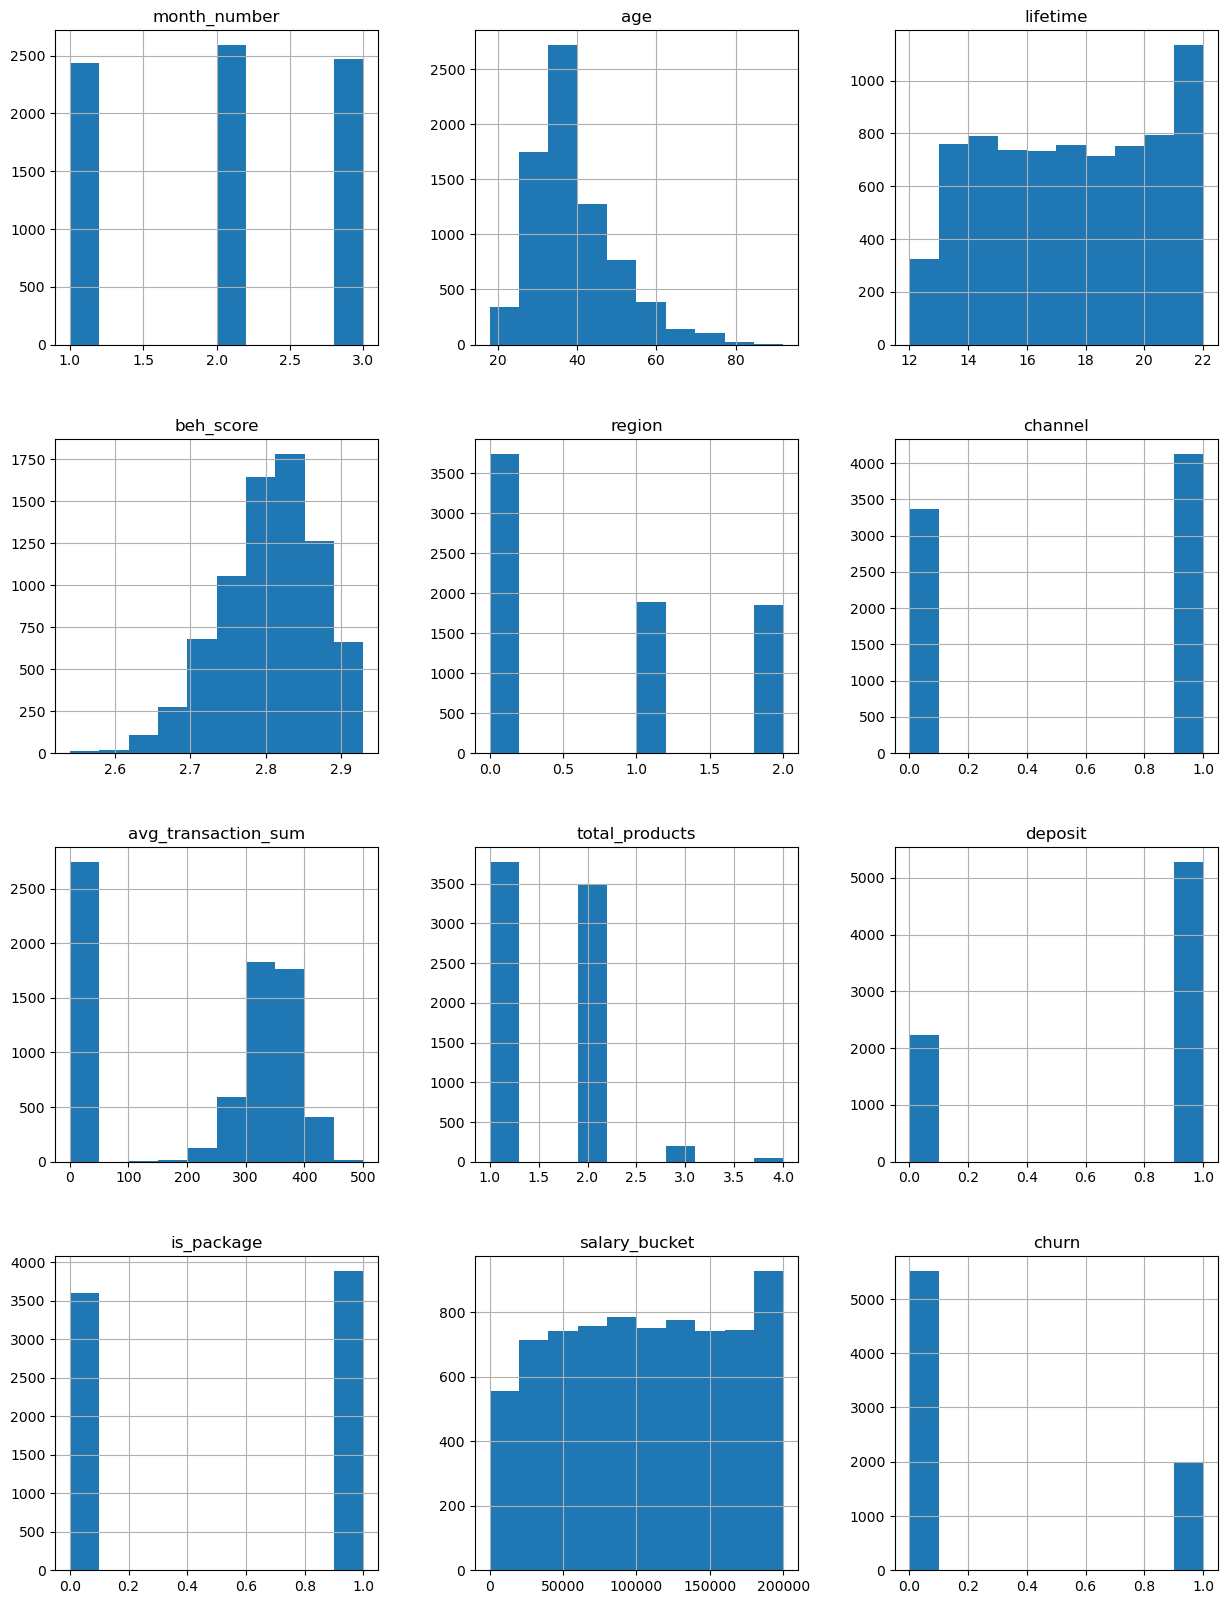

In [15]:
# Построена общая гистограмма для всех числовых столбцов таблицы (за исключением client_id).

data_final.hist(figsize=(15, 20), column=data_final.columns[1:], bins=10);

<div class="alert alert-info"><b>Наблюдения:</b>
    
- в признаке 'avg_transaction_sum' много нулевых и околонулевых значений
- данные в целевом признаке 'churn' несбалансированы
    
</div>

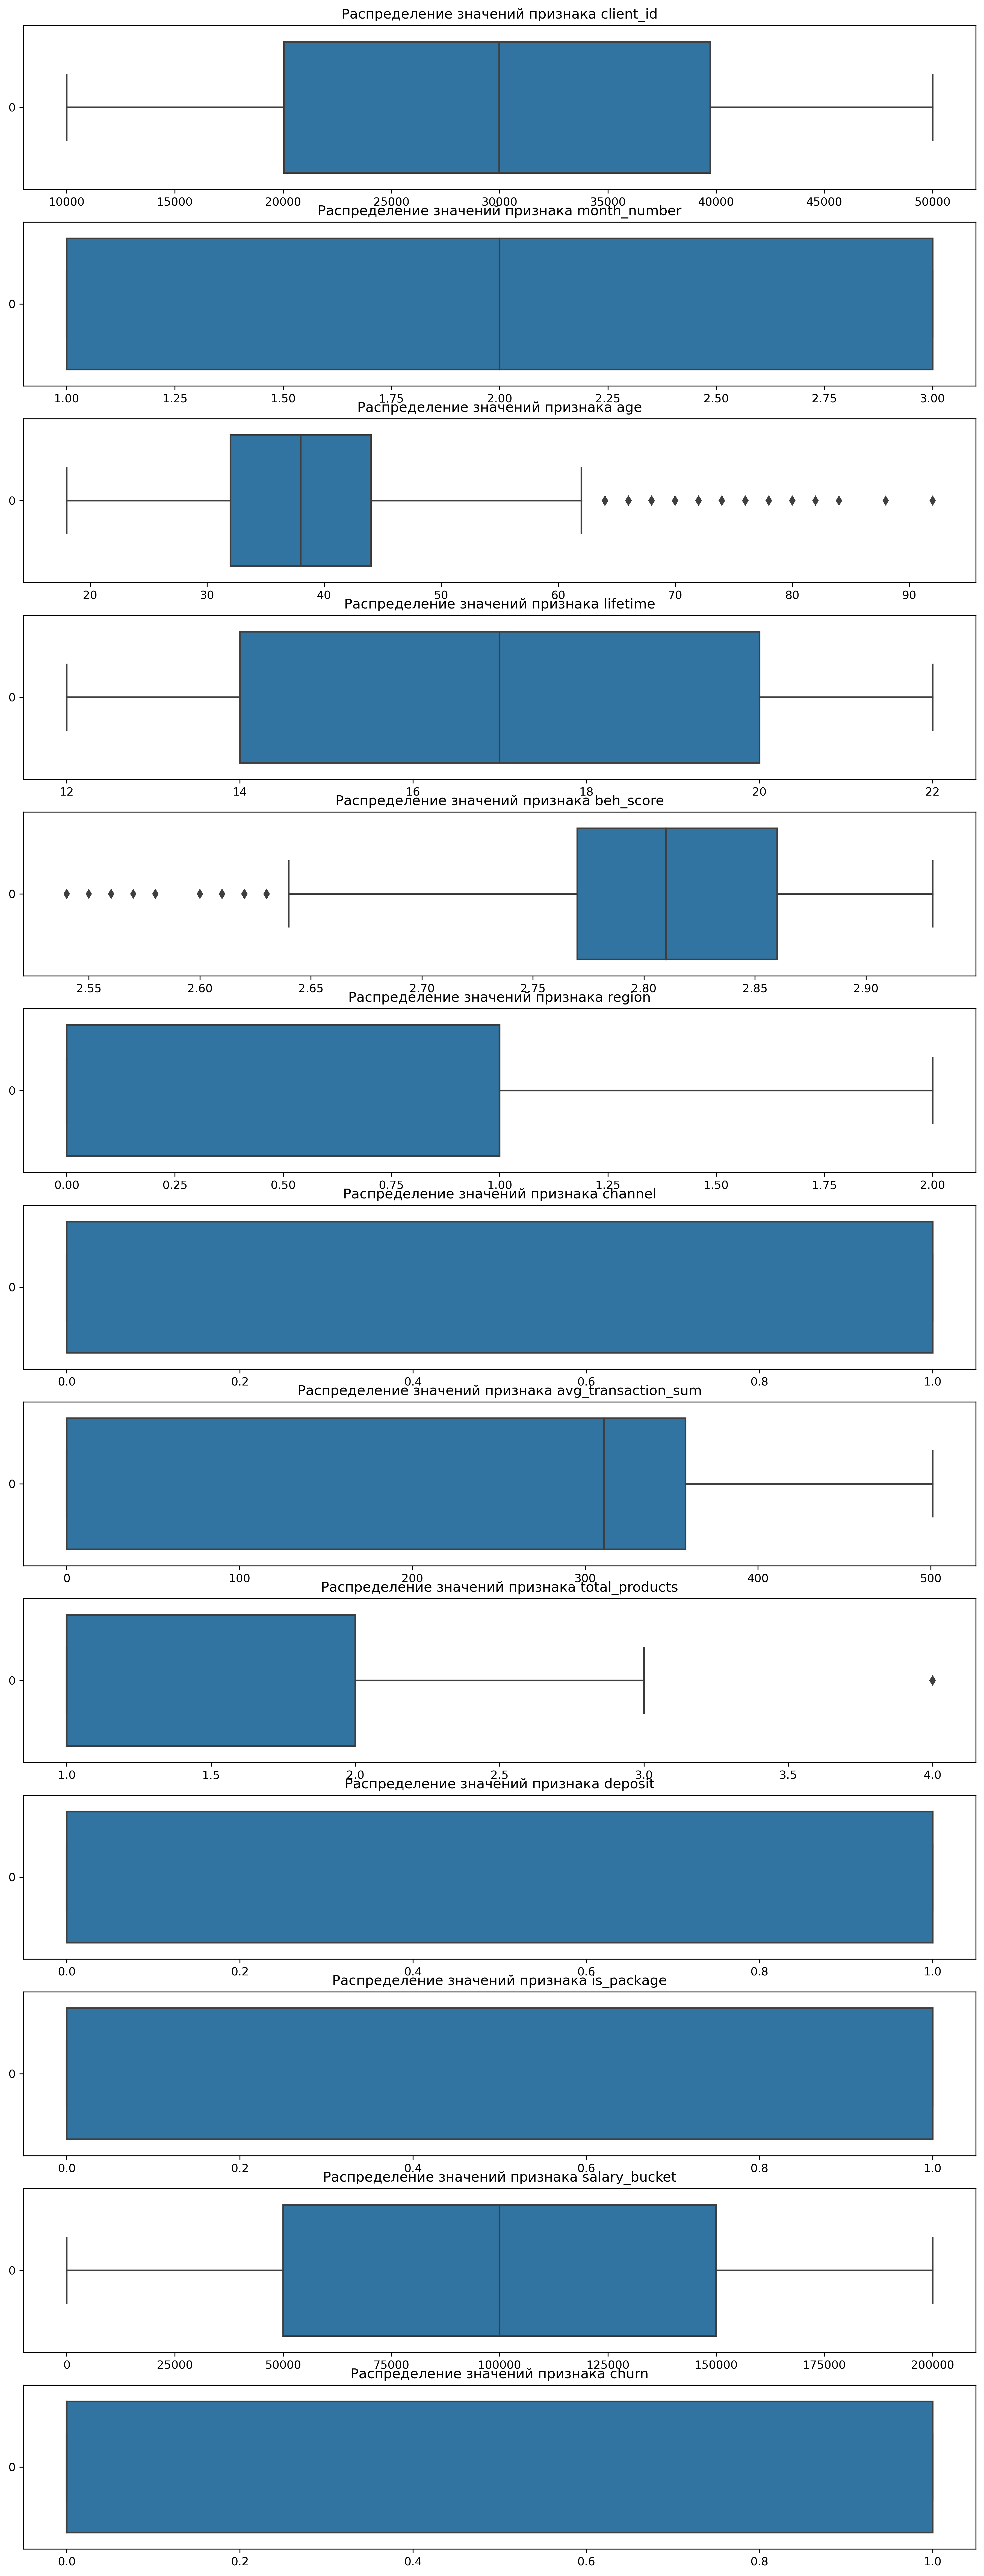

In [16]:
# Изучим числовые значения признаков (за исключением client_id) с помощью boxplot.

# numeric_features = data_final.columns[1:]
numeric_features = data_final.select_dtypes(exclude='object').columns.to_list()
fig, ax = plt.subplots(len(numeric_features), 1, figsize=(15,40), dpi=300)

for i in range(len(numeric_features)):    
    sns.boxplot(data=data_final[numeric_features[i]], orient='h', ax=ax[i])
    ax[i].title.set_text(f'Распределение значений признака {numeric_features[i]}')

<div class="alert alert-info">
    
Прослеживается выброс в признаке 'total_products', но т.к. в целом данные достаточно полные, удаление выброса может повлиять на качество модели ML.
Решил пока оставить выброс и посмотреть качество моделей.
    
</div>

### Исследование баланса классов.

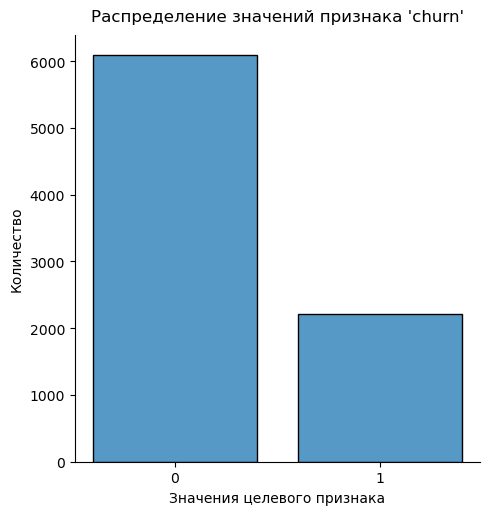

In [17]:
# Посмотрим распределение значений признака 'churn' на графике.
sns.displot(data, x="churn", shrink=.8, discrete=True)

plt.xticks(data['churn'].unique())
plt.xlabel('Значения целевого признака')
plt.ylabel('Количество')
plt.title("Распределение значений признака 'churn'", pad = 10);

 <div class="alert alert-info"><b>Наблюдения:</b>
   
Прослеживается несбалансированность классов в целевом признаке ('churn') в отношении примерно 1:3, поэтому в качестве оценочной метрики выберем F1-score.
</div>

In [18]:
# Удалим ненужный для обучения столбец 'client_id'.

data_final = data_final.drop(['client_id'], axis=1)
# data_final.head()

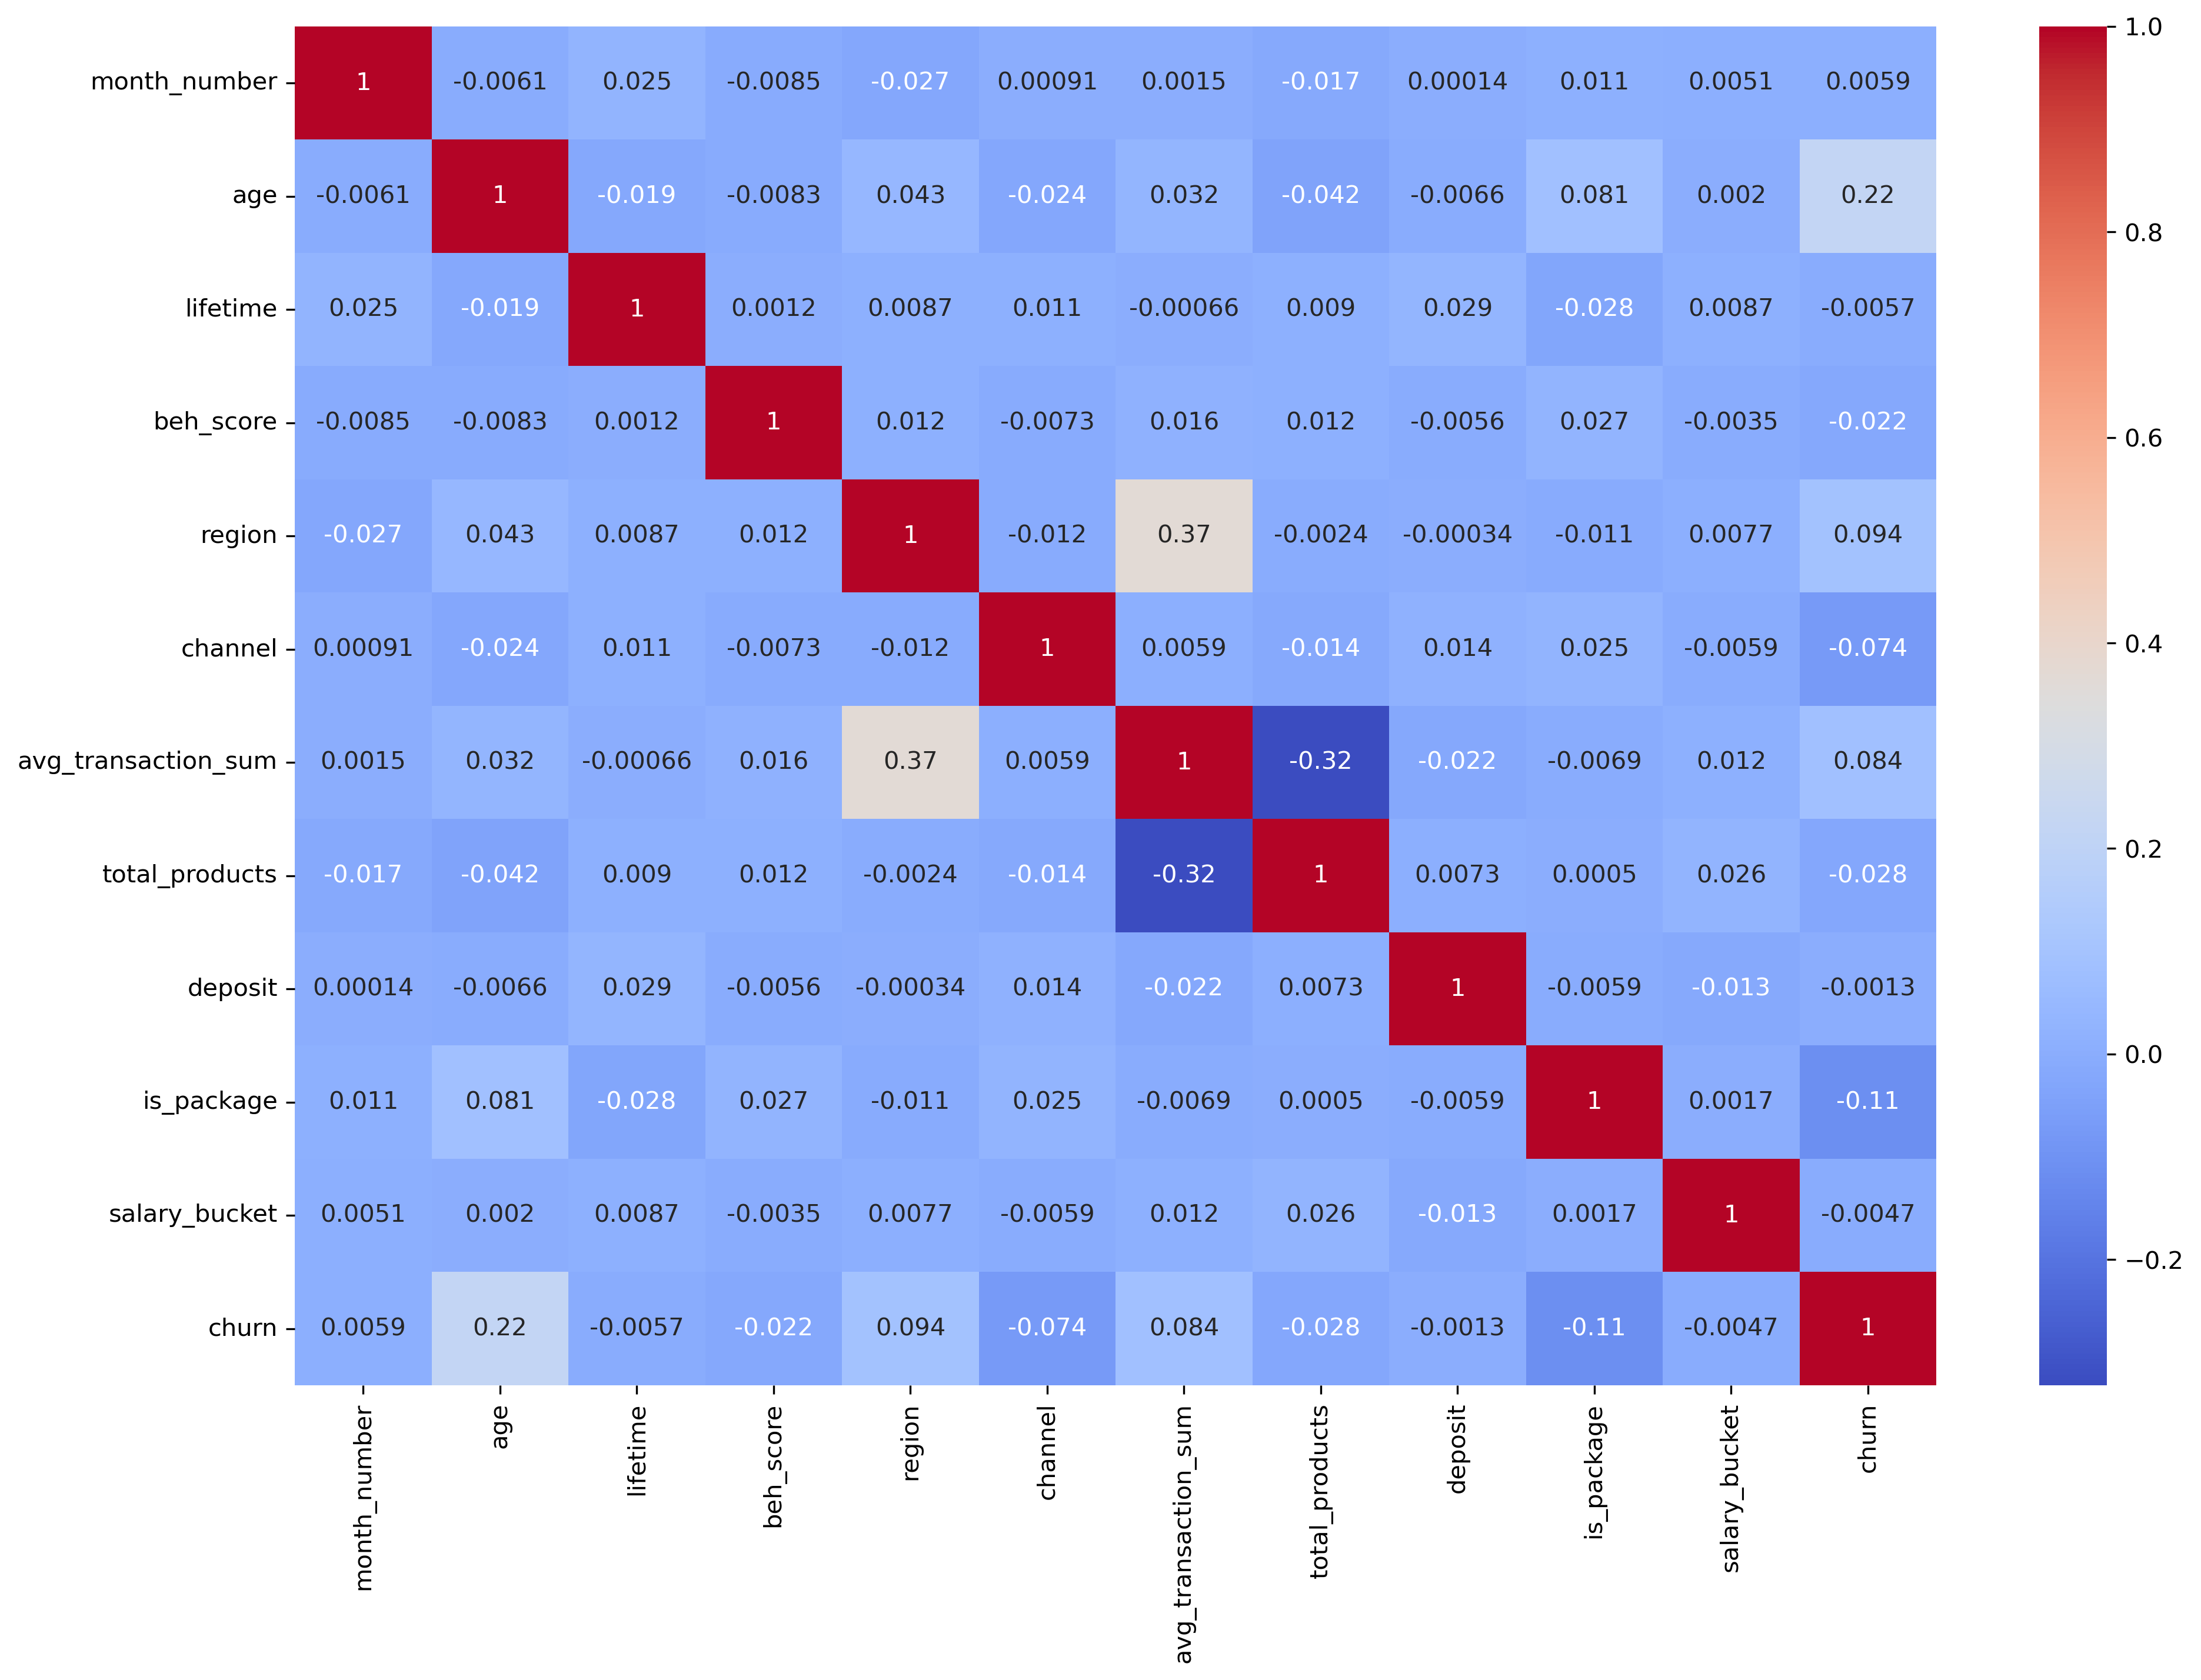

In [41]:
# Построим матрицу корреляции числовых признаков в итоговой таблице.

plt.figure(figsize=(15, 10), dpi=300)
sns.heatmap(data_final.corr(), annot=True, cmap='coolwarm');

# Признаков, явно коррелирующих с целевым, не имеется.

***

## Обучение моделей

<div class="alert alert-info">
    
Для получения более устойчивых результатов я буду применять при обучении моделей кроссвалидацию.
    
</div>

### RandomForestClassifier.

In [20]:
# Определение признаков и целевой переменной
features = data_final.drop(['churn'], axis=1)
target = data_final['churn']

# Разделение на обучающую и валидационную выборки с выравниванием по целевому признаку
X_train, X_valid, y_train, y_valid = train_test_split(features, target, 
                                                      test_size=0.2, 
                                                      random_state=RANDOM_STATE, 
                                                      stratify=target)

<div class="alert alert-info">
    
Метод апсемплинга в модели RandomForestClassifier дал максимальный прирост в метриках, поэтому я остановился на нем.
    
</div>

In [26]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(X_train, y_train, 3)

In [27]:
%%time

# Случайный лес, будучи моделью на основе дерева, не чувствителен к масштабу входных объектов, 
# поэтому масштабирование не применяем.

model_rf = RandomForestClassifier(n_estimators=300,        # <-- значение получено в результате подбора
                                  min_samples_split=10,    # <-- значение получено в результате подбора
                                  max_depth=10,            # <-- значение получено в результате подбора
                                 )

rf_params = {'random_state': range(6, 50, 2),
            }

grid_rf = GridSearchCV(model_rf,
                       rf_params,
                       scoring='roc_auc',
                       cv=5
                      )

# Обучение и подбор параметров
grid_rf.fit(features_upsampled, target_upsampled)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_rf.best_params_)
print("Лучшая оценка (ROC AUC):", grid_rf.best_score_)

Лучшие параметры: {'random_state': 16}
Лучшая оценка (ROC AUC): 0.8440239368771154
CPU times: total: 3min 41s
Wall time: 3min 43s


In [28]:
# Прогноз на валидационной выборке
y_pred_valid_rf = grid_rf.predict(X_valid)

# Расчет метрик
roc_auc_valid = roc_auc_score(y_valid, y_pred_valid_rf)
accuracy_valid = accuracy_score(y_valid, y_pred_valid_rf)
recall_valid = recall_score(y_valid, y_pred_valid_rf)
precision_valid = precision_score(y_valid, y_pred_valid_rf)
f1_valid = f1_score(y_valid, y_pred_valid_rf)

# Вывод результатов
print('\033[1m' + 'Модель "RandomForestClassifier"' + '\033[0m')
print('=' * 40)
print('\033[1m' + 'ROC-AUC на валидных данных:' + '\033[0m', roc_auc_valid)
print('\033[1m' + 'Accuracy на валидных данных:' + '\033[0m', accuracy_valid)
print('\033[1m' + 'Recall на валидных данных:' + '\033[0m', recall_valid)
print('\033[1m' + 'Precision на валидных данных:' + '\033[0m', precision_valid)
print('\033[1m' + 'F1-мера на валидных данных:' + '\033[0m', f1_valid)
print('=' * 40)

Модель "RandomForestClassifier"
ROC-AUC на валидных данных: 0.6705643390425999
Accuracy на валидных данных: 0.732
Recall на валидных данных: 0.5404040404040404
Precision на валидных данных: 0.4930875576036866
F1-мера на валидных данных: 0.5156626506024096


### CatBoostClassifier.

In [29]:
%%time

# Определение признаков и целевой переменной
features = data_final.drop(['churn'], axis=1)
target = data_final['churn']

# Разделение на обучающую и валидационную выборки с выравниванием по целевому признаку
X_train, X_valid, y_train, y_valid = train_test_split(features, target, 
                                                      test_size=0.2, 
                                                      random_state=RANDOM_STATE, 
                                                      stratify=target)

# В целях исключения утечки целевого признака при обучении масштабирование данных я буду применять через Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),    
    ('catboost', CatBoostClassifier(loss_function='Logloss',                                    
                                    auto_class_weights='Balanced',
                                    iterations=500,
                                    depth=6,             # <-- значение получено в результате подбора
                                    l2_leaf_reg=7,       # <-- значение получено в результате подбора
                                    border_count=128,    # <-- значение получено в результате подбора
                                    learning_rate=0.05,                                    
                                    silent=True))    
])

cbr_params = {'catboost__random_state': range(6, 50, 2),
             }

grid_cbr = GridSearchCV(pipe,
                        cbr_params,                            
                        scoring='roc_auc',
                        cv=5
                       )

# Обучение и подбор параметров
grid_cbr.fit(features_upsampled, target_upsampled)


# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_cbr.best_params_)
print('Значение метрики roc_auc модели CatBoostClassifier:', grid_cbr.best_score_)

Лучшие параметры: {'catboost__random_state': 20}
Значение метрики roc_auc модели CatBoostClassifier: 0.8443633830166319
CPU times: total: 7min 42s
Wall time: 2min 50s


In [30]:
# Прогноз на валидационной выборке
y_pred_valid_cb = grid_cbr.predict(X_valid)

# Расчет метрик
roc_auc_valid = roc_auc_score(y_valid, y_pred_valid_cb)
accuracy_valid = accuracy_score(y_valid, y_pred_valid_cb)
recall_valid = recall_score(y_valid, y_pred_valid_cb)
precision_valid = precision_score(y_valid, y_pred_valid_cb)
f1_valid = f1_score(y_valid, y_pred_valid_cb)

# Вывод результатов
print('\033[1m' + 'Модель "CatBoostClassifier"' + '\033[0m')
print('=' * 40)
print('\033[1m' + 'ROC-AUC на валидных данных:' + '\033[0m', roc_auc_valid)
print('\033[1m' + 'Accuracy на валидных данных:' + '\033[0m', accuracy_valid)
print('\033[1m' + 'Recall на валидных данных:' + '\033[0m', recall_valid)
print('\033[1m' + 'Precision на валидных данных:' + '\033[0m', precision_valid)
print('\033[1m' + 'F1-мера на валидных данных:' + '\033[0m', f1_valid)
print('=' * 40)

Модель "CatBoostClassifier"
ROC-AUC на валидных данных: 0.6617259552042161
Accuracy на валидных данных: 0.7273333333333334
Recall на валидных данных: 0.5227272727272727
Precision на валидных данных: 0.4847775175644028
F1-мера на валидных данных: 0.5030376670716888


### Сравнение выбранной модели с константной.

In [31]:
# Сравним полученную модель со случайной.

dummy_model = DummyClassifier().fit(X_train, y_train)
dummy_predict = dummy_model.predict(X_valid)

roc_auc_dummy = roc_auc_score(y_valid, dummy_predict)
accuracy_dummy = accuracy_score(y_valid, dummy_predict)
recall_dummy = recall_score(y_valid, dummy_predict)
precision_dummy = precision_score(y_valid, dummy_predict)
f1_dummy = f1_score(y_valid, dummy_predict)

# Вывод результатов
print('\033[1m' + 'Модель "DummyClassifier"' + '\033[0m')
print('=' * 40)
print('\033[1m' + 'ROC-AUC на валидных данных:' + '\033[0m', roc_auc_dummy)
print('\033[1m' + 'Accuracy на валидных данных:' + '\033[0m', accuracy_dummy)
print('\033[1m' + 'Recall на валидных данных:' + '\033[0m', recall_dummy)
print('\033[1m' + 'Precision на валидных данных:' + '\033[0m', precision_dummy)
print('\033[1m' + 'F1-мера на валидных данных:' + '\033[0m', f1_dummy)
print('=' * 40)

Модель "DummyClassifier"
ROC-AUC на валидных данных: 0.5
Accuracy на валидных данных: 0.736
Recall на валидных данных: 0.0
Precision на валидных данных: 0.0
F1-мера на валидных данных: 0.0


<div class="alert alert-info">
    
Обе модели на валидационных данных показывают результат по всем метрикам лучше случайного и могут применяться.
Для окончательного выбора модели построим Roc-кривые.
    
</div>

### Проверка через построение Roc-кривых.

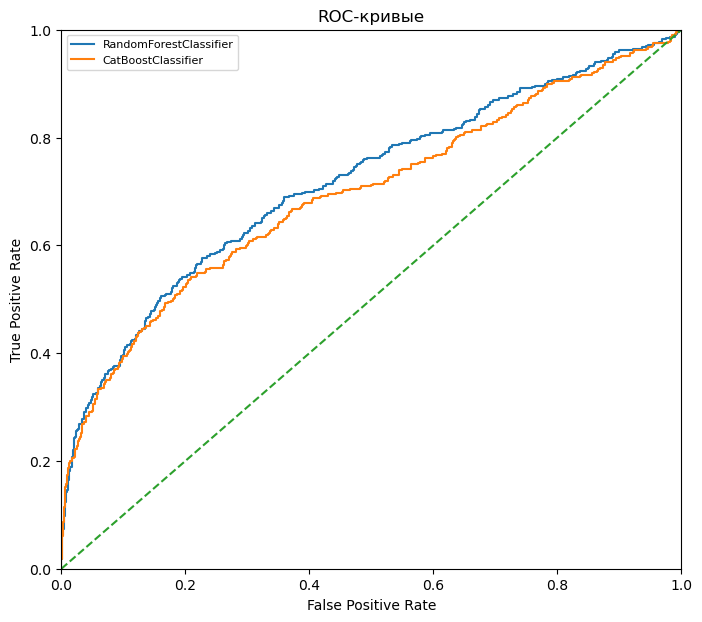

In [32]:
# Построим дополнительно Roc-кривые

# Модель RandomForestClassifier (upsampling)
probabilities_test_forest = grid_rf.predict_proba(X_valid)
fpr_forest, tpr_forest, thresholds = roc_curve(y_valid, probabilities_test_forest[:, 1])

# Модель CatBoostClassifier
probabilities_test_cat = grid_cbr.predict_proba(X_valid)
fpr_cat, tpr_cat, thresholds = roc_curve(y_valid, probabilities_test_cat[:, 1])

plt.figure(figsize=(8,7))

plt.plot(fpr_forest, tpr_forest)
plt.plot(fpr_cat, tpr_cat)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0, 1])
plt.xlim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(('RandomForestClassifier', 'CatBoostClassifier'), loc='upper left', fontsize=8);

<div class="alert alert-info"><b>Комментарий:</b>
   
Модель RandomForestClassifier как по метрикам, так и при исследовании Roc-кривых показывает лучший результат по сравнению с CatBoostClassifier.
</div>

***

## Анализ значимости признаков.

In [33]:
# Выделим в отдельную переменную сведения о значимости признаков.

importances = grid_rf.best_estimator_.feature_importances_

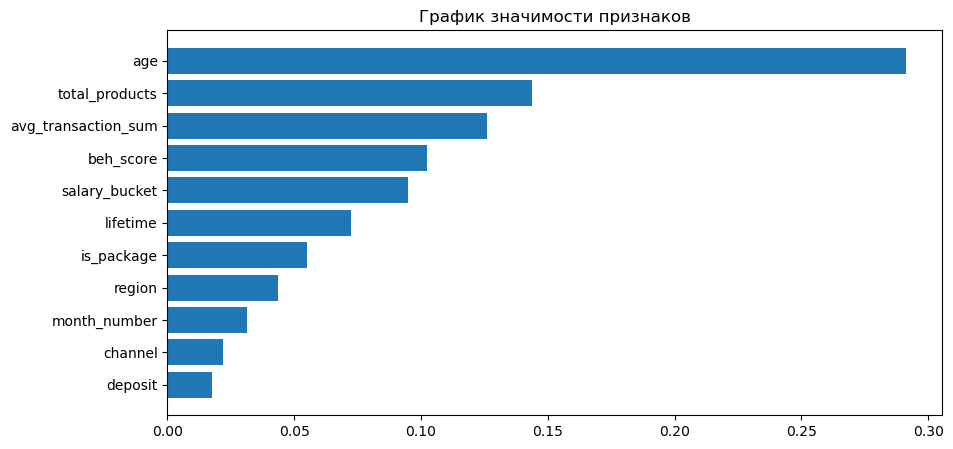

In [34]:
# Построим график значимости признаков для предсказания выбранной модели.

indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

plt.title("График значимости признаков", size=12);

***

## Описательный профиль склонного к оттоку клиента.

In [35]:
# Выделим Топ-8 значимых для обучения модели признаков

top8_indices = importances.argsort()[-8:][::-1]
top8_features = X_train.columns[top8_indices]

In [36]:
# Сформируем датасет, в котором оставим данные об ушедших клиентах (Топ-8 значимых для обучения модели признаков)

importances_df = data_final.loc[data_final['churn'] == 1][top8_features]
importances_df.head()

,age,total_products,avg_transaction_sum,beh_score,salary_bucket,lifetime,is_package,region
2,48,1,327,2.80,150000,13,1,2
6,42,3,0,2.79,60000,18,0,0
10,50,2,343,2.81,80000,21,0,0
13,50,3,0,2.87,70000,15,1,1
18,36,1,359,2.88,40000,19,1,0


In [37]:
# Профиль склонного к оттоку клиента

print('\033[1m' + 'Профиль склонного к оттоку клиента' + '\033[0m')
print('=' * 40)

for i in top8_features:
    print('\033[1m' + 'Медианное значение признака' + " " + i + ':' + '\033[0m', importances_df[i].median())

Профиль склонного к оттоку клиента
Медианное значение признака age: 42.0
Медианное значение признака total_products: 1.0
Медианное значение признака avg_transaction_sum: 323.0
Медианное значение признака beh_score: 2.81
Медианное значение признака salary_bucket: 100000.0
Медианное значение признака lifetime: 17.0
Медианное значение признака is_package: 0.0
Медианное значение признака region: 1.0


In [38]:
# Сформируем датасет, в котором оставим данные об оставшихся клиентах (Топ-8 значимых для обучения модели признаков)

importances_df_positive = data_final.loc[data_final['churn'] == 0][top8_features]
importances_df_positive.head()

,age,total_products,avg_transaction_sum,beh_score,salary_bucket,lifetime,is_package,region
0,38,1,345,2.73,70000,21,1,0
1,30,1,269,2.80,30000,21,1,0
3,40,1,0,2.68,30000,15,1,0
4,20,1,0,2.88,190000,21,0,1
5,32,2,347,2.77,160000,16,1,2


In [39]:
# Профиль не склонного к оттоку клиента

print('\033[1m' + 'Профиль не склонного к оттоку клиента' + '\033[0m')
print('=' * 40)

for i in top8_features:
    print('\033[1m' + 'Медианное значение признака' + " " + i + ':' + '\033[0m', importances_df_positive[i].median())

Профиль не склонного к оттоку клиента
Медианное значение признака age: 36.0
Медианное значение признака total_products: 2.0
Медианное значение признака avg_transaction_sum: 305.0
Медианное значение признака beh_score: 2.81
Медианное значение признака salary_bucket: 100000.0
Медианное значение признака lifetime: 17.0
Медианное значение признака is_package: 1.0
Медианное значение признака region: 0.0


 <div class="alert alert-info"><b>Разница между профилями клиентов (медианные значения):</b>

* Признак age (склонны к уходу - 42, не склонны - 36)
* Признак total_products (склонны к уходу - 1, не склонны - 2)
* Признак avg_transaction_sum (склонны к уходу - 323, не склонны - 305
* Признак is_package (склонны к уходу - 0, не склонны - 1)
* Признак region (склонны к уходу - 'Saint-Petersbourgh', не склонны - 'Moscow')

</div>

***